In [49]:
import pandas as pd
import matplotlib.pyplot as plt

metrics_16 = pd.read_csv('../metrics-logs/metrics-16-cores.csv')
metrics_10 = pd.read_csv('../metrics-logs/metrics-10-cores.csv')
metrics_1 = pd.read_csv('../metrics-logs/metrics-1-cores.csv')
metrics_2 = pd.read_csv('../metrics-logs/metrics-2-cores.csv')
metrics_6 = pd.read_csv('../metrics-logs/metrics-6-cores.csv')
# metrics.head()

In [50]:
def compute_average_runtime(metrics):

    finish_events = metrics.loc[metrics['Events'] == "FINISH"]

    finish_events['EPS'] = finish_events['EPS'].str.replace('ms', '').astype(float)

    return finish_events['EPS'].mean() / 1000


runtime_1 = compute_average_runtime(metrics_1)
print(f"Runtime for 1 cores: {runtime_1:.2f} seconds")

runtime_2 = compute_average_runtime(metrics_2)
print(f"Runtime for 2 cores: {runtime_2:.2f} seconds")

runtime_6 = compute_average_runtime(metrics_6)
print(f"Runtime for 6 cores: {runtime_6:.2f} seconds")

runtime_10 = compute_average_runtime(metrics_10)
print(f"Runtime for 10 cores: {runtime_10:.2f} seconds")

runtime_16 = compute_average_runtime(metrics_16)
print(f"Runtime for 16 cores: {runtime_16:.2f} seconds")

Runtime for 1 cores: 121.13 seconds
Runtime for 2 cores: 123.99 seconds
Runtime for 6 cores: 90.68 seconds
Runtime for 10 cores: 88.37 seconds
Runtime for 16 cores: 99.49 seconds


/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_18671/430383239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_events['EPS'] = finish_events['EPS'].str.replace('ms', '').astype(float)
/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_18671/430383239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_events['EPS'] = finish_events['EPS'].str.replace('ms', '').astype(float)
/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_18671/430383239.py:5: SettingWithCopyWa

/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_18671/3999746485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['EPS'] = metrics['EPS'].astype(float)
/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_18671/3999746485.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['Core_ID'] = metrics['Core_ID'].astype(int)
/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_18671/3999746485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

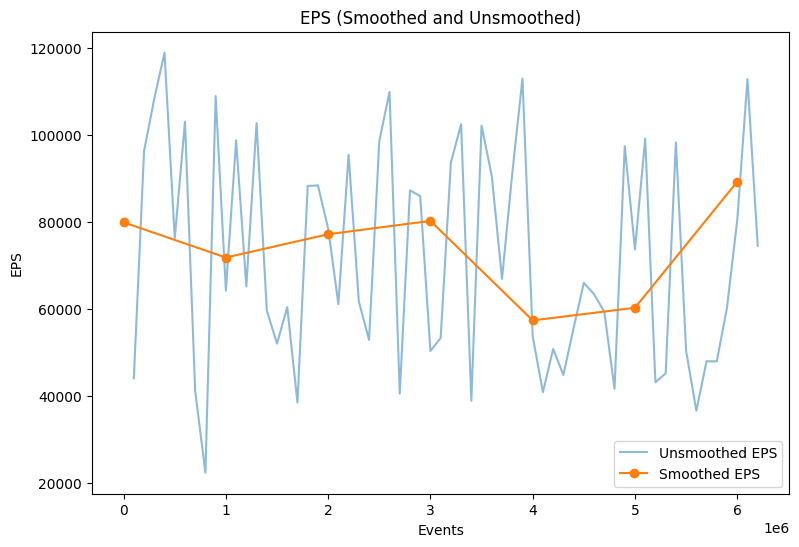

In [51]:
def smooth_eps(metrics, interval=1e6):
    # exclude 'FINISH' events
    metrics = metrics[metrics['Events'] != 'FINISH']
    
    metrics['EPS'] = metrics['EPS'].astype(float)
    metrics['Core_ID'] = metrics['Core_ID'].astype(int)
    metrics['Events'] = metrics['Events'].astype(int)
    
    # Group by Events and calculate the mean EPS across Core_ID
    metrics = metrics.groupby('Events', as_index=False).agg({'EPS': 'mean'})
    
    # per 1 million events
    metrics['Event_Group'] = (metrics['Events'] // interval) * interval
    
    # smoothing over interval
    smoothed = metrics.groupby('Event_Group')['EPS'].mean().reset_index()
    
    # Plot unsmoothed EPS
    plt.figure(figsize=(9, 6))
    plt.plot(metrics['Events'], metrics['EPS'], label='Unsmoothed EPS', alpha=0.5)
    
    # Plot smoothed EPS
    plt.plot(smoothed['Event_Group'], smoothed['EPS'], marker='o', label='Smoothed EPS')
    
    plt.xlabel('Events')
    plt.ylabel('EPS')
    plt.title('EPS (Smoothed and Unsmoothed)')
    plt.legend()
    plt.show()

smooth_eps(metrics_16)
# smooth_eps(metrics_1)

In [ ]:
# 10 million events total

# varying number of cores

# average eps per core per 100k events


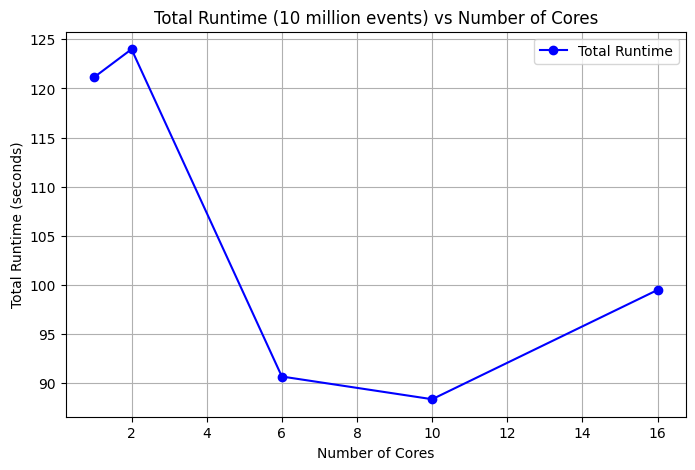

In [55]:
cores = [1, 2, 6, 10, 16]
runtimes = [runtime_1, runtime_2, runtime_6, runtime_10, runtime_16]

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(cores, runtimes, marker='o', linestyle='-', color='b', label='Total Runtime')
plt.xlabel('Number of Cores')
plt.ylabel('Total Runtime (seconds)')
plt.title('Total Runtime (10 million events) vs Number of Cores')
plt.grid(True)
plt.legend()
plt.show()